# Customer Churn Prediction: Machine Learning Pipeline

A Customer Churn Prediction pipeline typically refers to the process of building a machine learning model to predict if a customer will leave (churn) or stay with a company. The goal is to identify customers who are likely to churn, so the company can take proactive measures to retain them.

This pipeline involves several steps, including data collection, data preprocessing, feature engineering, model training, evaluation, and deployment.

Here’s a step-by-step breakdown of a Customer Churn Prediction machine learning pipeline:

### 1. Import Necessary Libraries

In [3]:
# Importing necessary libraries for data handling, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing machine learning libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing evaluation metrics for model evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)


### 2. Load & Explore the Dataset (EDA)

In [5]:
# Load the dataset from a CSV file
df = pd.read_csv('C:/Users/sowjanya/Desktop/Data Science Projects/Customer Segmentation/Telco_customer_churn.csv')

# Clean column names (strip extra spaces)
df.columns = df.columns.str.strip()

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get a concise summary of the dataset

# Check for missing values in each column
print("Missing values per column:\n", df.isnull().sum())


Dataset Shape: (7043, 33)
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Me

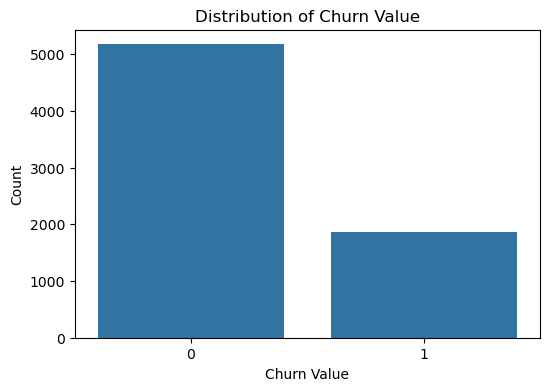

In [6]:
# Visual 1: Distribution of the target variable (assume target is 'Churn Value')
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Value', data=df)
plt.title("Distribution of Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Count")
plt.show()

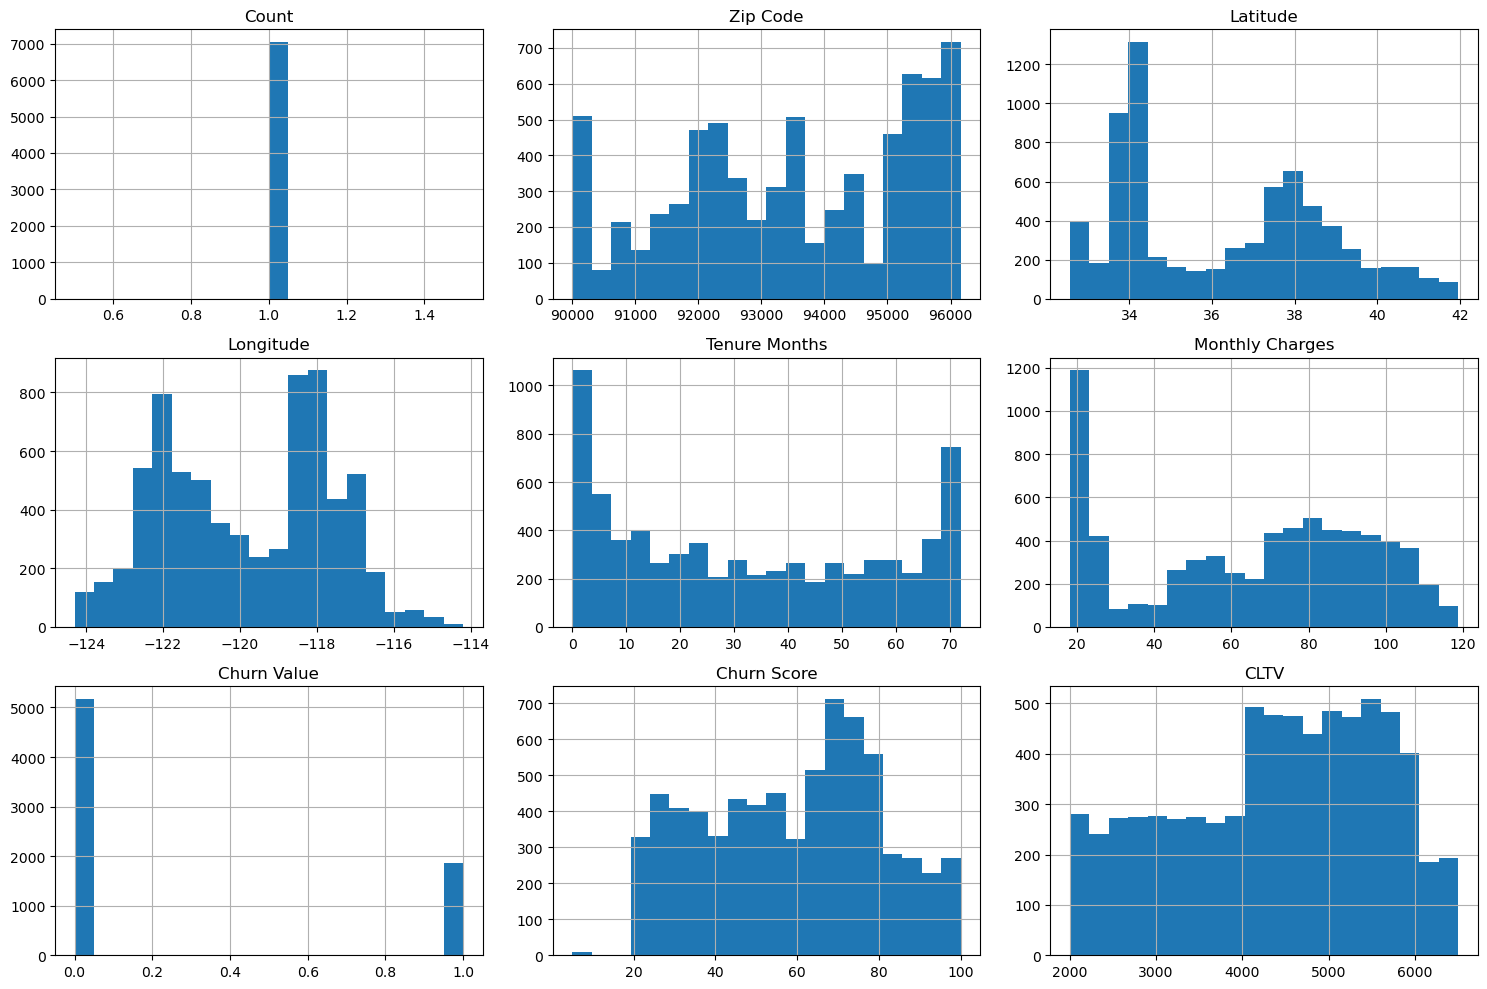

In [7]:
# Visual 2: Histogram of numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15,10), layout=(3,3))
plt.tight_layout()
plt.show()

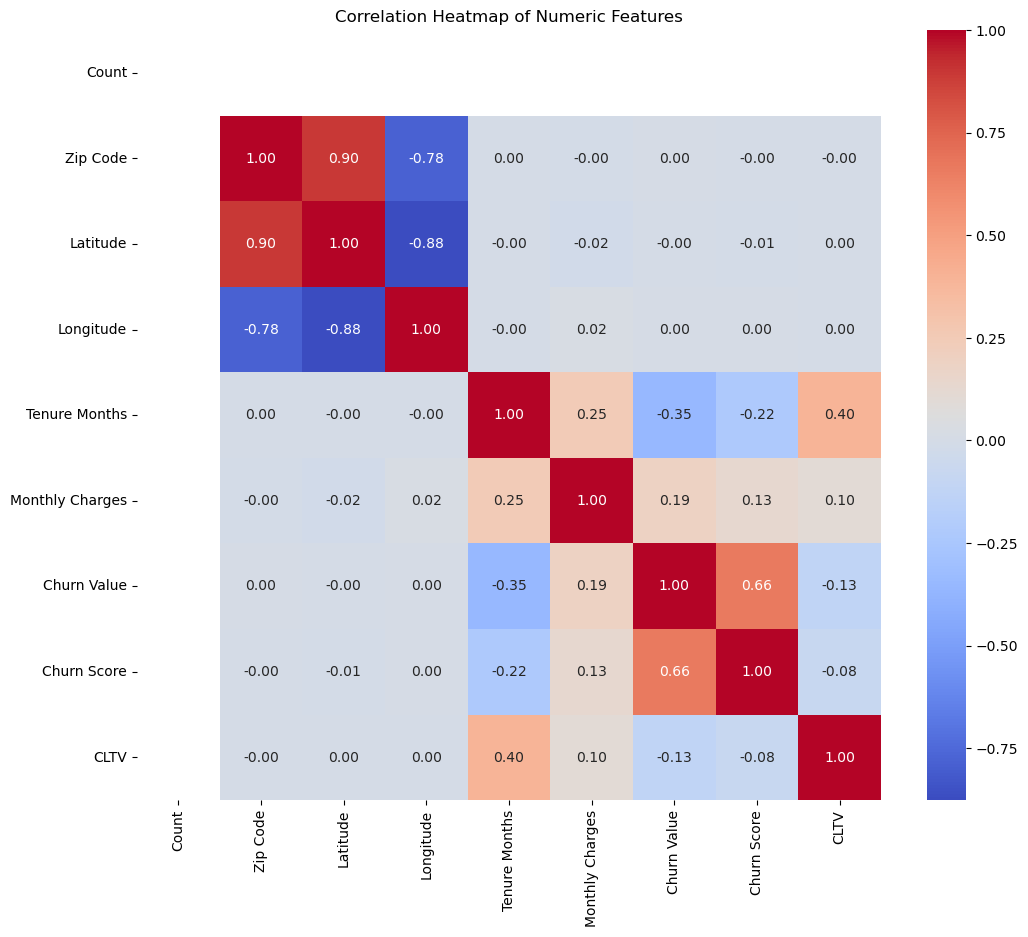

In [8]:
# Visual 3: Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### 3. Data Preprocessing

In [10]:
# Convert 'Total Charges' to numeric if present (replace spaces, coercing errors)
if 'Total Charges' in df.columns:
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
    df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Drop unnecessary columns if present
df = df.drop(columns=['CustomerID', 'Churn Label'], errors='ignore')

# Define Features (X) and Target (y)
# Assuming 'Churn Value' is the target column.
X = df.drop(columns=['Churn Value'], axis=1)
y = df['Churn Value']


### 4. Train-Test Split and Feature Scaling

In [12]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling: Standardize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 5. Model Training & Predictions

#### 1. Logistic Regression Model: Confusion Matrix & ROC Curve
a. Confusion Matrix: Visualize how well the Logistic Regression model performs.
b. ROC Curve: Evaluate the model's true positive rate (TPR) and false positive rate (FPR).

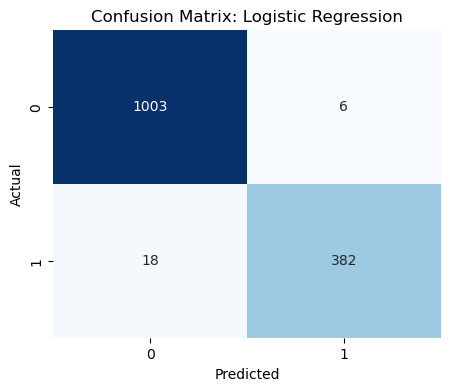

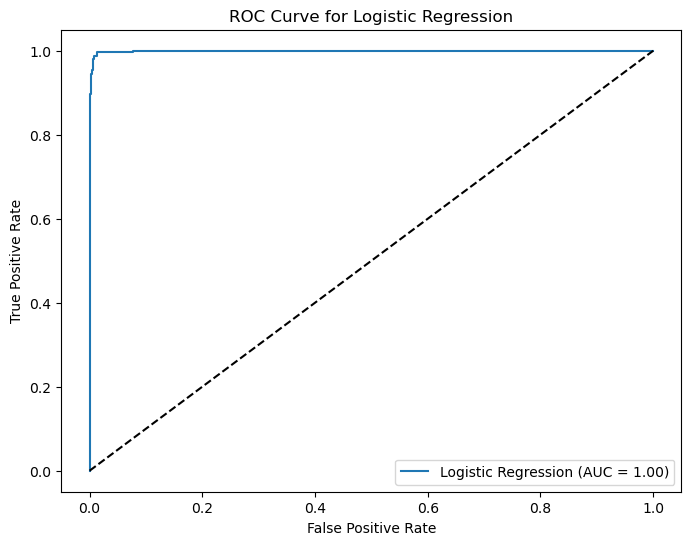

Accuracy for Logistic Regression: 0.9830
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1009
           1       0.98      0.95      0.97       400

    accuracy                           0.98      1409
   macro avg       0.98      0.97      0.98      1409
weighted avg       0.98      0.98      0.98      1409



In [15]:
# Fit Logistic Regression Model

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# 1. Confusion Matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

plot_confusion_matrix(cm_lr, "Logistic Regression")

# 2. ROC Curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Print Accuracy Score for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression: {accuracy_lr:.4f}")

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


#### 2. Random Forest Classifier Model: Confusion Matrix & ROC Curve
a. Confusion Matrix: Visualize the performance of the Random Forest Classifier.
b. ROC Curve: Evaluate the model's performance with ROC curve and AUC score.

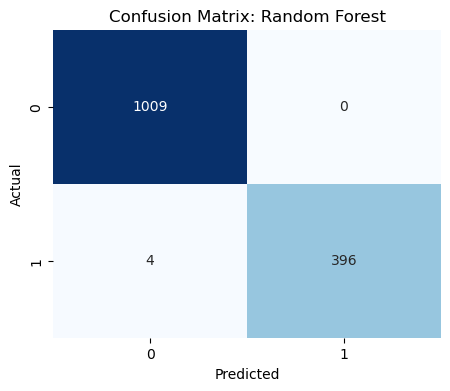

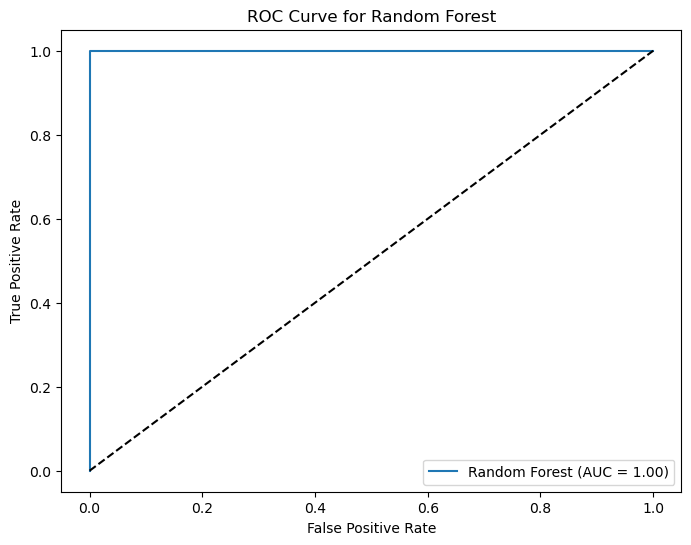

Accuracy for Random Forest: 0.9972
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      0.99      0.99       400

    accuracy                           1.00      1409
   macro avg       1.00      0.99      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [17]:
# Random Forest Classifier

# Fit Random Forest Classifier Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve

# -------------------------------
# 1. Confusion Matrix
# -------------------------------
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(cm_rf, "Random Forest")

# -------------------------------
# 2. ROC Curve
# -------------------------------
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

# Print Accuracy Score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.4f}")

# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


#### 3. K-Nearest Neighbors Model: Confusion Matrix & ROC Curve
a. Confusion Matrix: Visualize the performance of the KNN model.
b. ROC Curve: Evaluate the model's performance with ROC curve and AUC score.

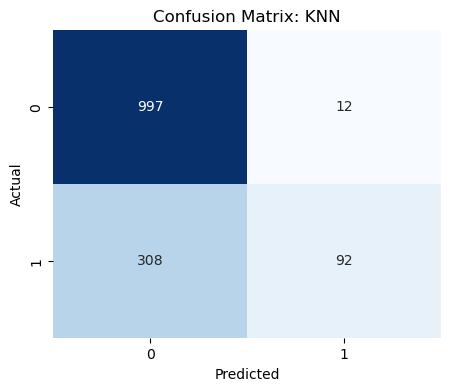

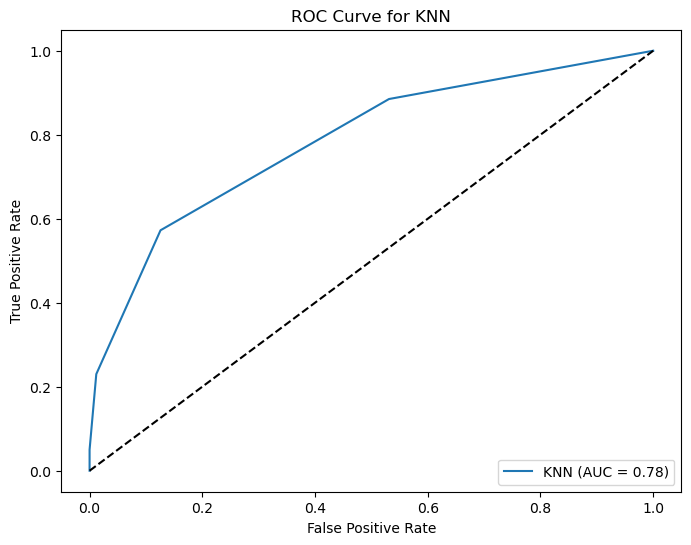

Accuracy for KNN: 0.7729
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1009
           1       0.88      0.23      0.37       400

    accuracy                           0.77      1409
   macro avg       0.82      0.61      0.61      1409
weighted avg       0.80      0.77      0.72      1409



In [19]:
# K-Nearest Neighbors

# Fit KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# If available, get probabilities for ROC curve
try:
    y_prob_knn = knn.predict_proba(X_test)[:, 1]
except AttributeError:
    # If not available, set to None and skip ROC curve for KNN
    y_prob_knn = None

# -------------------------------
# 1. Confusion Matrix
# -------------------------------
cm_knn = confusion_matrix(y_test, y_pred_knn)

plot_confusion_matrix(cm_knn, "KNN")

# -------------------------------
# 2. ROC Curve (If probabilities are available)
# -------------------------------
if y_prob_knn is not None:
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
    roc_auc_knn = auc(fpr_knn, tpr_knn)

    # Plot ROC Curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for KNN")
    plt.legend(loc="lower right")
    plt.show()

# Print Accuracy Score for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for KNN: {accuracy_knn:.4f}")

# Classification Report for KNN 
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))


### 6. Model Accuracy Comparison
Now that we've trained and evaluated all models, let's compare their accuracy scores.

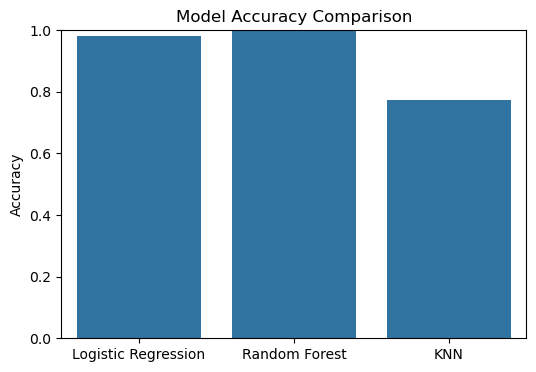

In [21]:
# Calculate the accuracy for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Store accuracy values in a list
model_names = ['Logistic Regression', 'Random Forest', 'KNN']
model_acc = [accuracy_lr, accuracy_rf, accuracy_knn]

# Plot the bar graph
plt.figure(figsize=(6,4))
sns.barplot(x=model_names, y=model_acc)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()


### 7. ROC AUC Comparison Bar Graph
Next, we'll compare the AUC scores of each model.

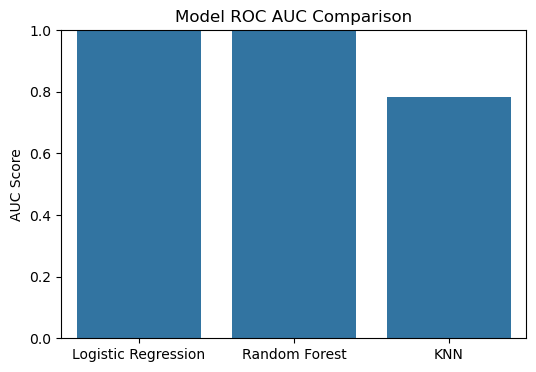

In [23]:
from sklearn.metrics import roc_auc_score

# Assuming you have the predicted probabilities for each model:
auc_scores = {}

# Logistic Regression AUC
auc_scores['Logistic Regression'] = roc_auc_score(y_test, y_prob_lr)

# Random Forest AUC
auc_scores['Random Forest'] = roc_auc_score(y_test, y_prob_rf)

# KNN AUC (if predict_proba is available for KNN)
if y_prob_knn is not None:
    auc_scores['KNN'] = roc_auc_score(y_test, y_prob_knn)
else:
    print("KNN does not support predict_proba; skipping ROC AUC calculation.")

# Now you can plot the AUC comparison bar graph
plt.figure(figsize=(6,4))
model_names_auc = list(auc_scores.keys())
model_auc = list(auc_scores.values())
sns.barplot(x=model_names_auc, y=model_auc)
plt.ylabel("AUC Score")
plt.ylim(0, 1)
plt.title("Model ROC AUC Comparison")
plt.show()


### 8. Final Model Selection for Deployment
Based on the comparison, you can decide the best model for deployment. Here, we compare both accuracy and AUC scores to choose the best one.

In [28]:
# Store accuracy and AUC scores for each model
accuracy_scores = {
    "Logistic Regression": accuracy_lr,
    "Random Forest": accuracy_rf,
    "KNN": accuracy_knn
}

roc_auc_scores = {
    "Logistic Regression": roc_auc_lr,
    "Random Forest": roc_auc_rf,
    "KNN": roc_auc_knn if y_prob_knn is not None else 0  # Default to 0 if KNN doesn't support it
}

# Print Accuracy and AUC Scores
print("Accuracy Scores:")
for name, score in accuracy_scores.items():
    print(f"{name}: {score:.4f}")

print("\nAUC Scores:")
for name, score in roc_auc_scores.items():
    print(f"{name}: {score:.4f}")

# Determine the best model based on Accuracy and AUC
best_model_accuracy = max(accuracy_scores, key=accuracy_scores.get)
best_model_auc = max(roc_auc_scores, key=roc_auc_scores.get)

# Final Model Selection
if accuracy_scores[best_model_accuracy] >= roc_auc_scores[best_model_auc]:
    best_model = best_model_accuracy
else:
    best_model = best_model_auc

print(f"\nFinal Model Selected for Deployment: {best_model}")


Accuracy Scores:
Logistic Regression: 0.9830
Random Forest: 0.9972
KNN: 0.7729

AUC Scores:
Logistic Regression: 0.9992
Random Forest: 1.0000
KNN: 0.7846

Final Model Selected for Deployment: Random Forest


#                                                                            Thank You!